In [1]:
import matplotlib.pyplot as plt

In [2]:
from catalyst.api import symbol, order, record, order_target_percent
from catalyst import run_algorithm
from logbook import Logger
import talib
import pandas as pd

In [3]:
log = Logger('BB_ALGO_TEST')

In [4]:
def initialize(context):
    context.asset = symbol('btc_usdt')
    context.holding = False
    context.i = 0
    context.high_value = 0

In [5]:
def handle_data(context, data):
    context.i += 1
    open_history = data.history(context.asset, 'open', bar_count = 20, frequency = '1D')
    high_history = data.history(context.asset, 'high', bar_count = 20, frequency = '1D')
    low_history = data.history(context.asset, 'low', bar_count = 20, frequency = '1D')
    close_history = data.history(context.asset, 'close', bar_count = 20, frequency = '1D')
    price_history = data.history(context.asset, 'price', bar_count = 20, frequency = '1D')
    log.info('got historical data')
    log.info('hist data is :\n{}'.format(close_history))
    log.info('close hist of 0 is {}'.format(close_history[0]))
    log.info('close hist of -1 is {}'.format(close_history[-1]))
#     log.info('price hist of -1 is {}'.format(price_history[-1]))
        
    
    open1 = data.current(context.asset, 'open')
    high = data.current(context.asset, 'high')
    low = data.current(context.asset, 'low')
    close = data.current(context.asset, 'close')
    volume = data.current(context.asset, 'volume')
    price = data.current(context.asset, 'price')
    log.info('got current values : open1: {}\t high: {}\t low: {}\t close: {}\t price: {}'.format(open1, high, low, close, price))
 
 
    mid_price_history = (open_history + close_history) / 2
    mid_price = ( open1 + close ) / 2
    
    signal= get_match(open_history, high_history, low_history,close_history, open1, high, low, close, price)
    
    if( context.high_value < close_history[-1]):
        context.high_value = close_history[-1]
    else:
        pass
    
    
    log.info('****high value is : {}'.format(context.high_value))
    
    if signal == 1 and not context.holding:
        order_target_percent(context.asset, 1)
        context.holding = True
        log.info('\n\t>>>>>target reached bought 100% at : {}<<<<<'.format(price))
            
    elif signal == -1 and context.holding:
        if((context.high_value * 0.04) < (context.high_value - close) ):
            log.info('HV*4%: {} < HV-CV: {}'.format((context.high_value * 0.04),(context.high_value - close)))
            order_target_percent(context.asset, 0)
            context.holding = False
            log.info('\n\t>>>>>sold 100% at : {}<<<<<'.format(price))
            context.high_value = 0
    else:
        log.info('----not bought anything-----')
#         pass
    
    log.info('the value of i is : {}'.format(context.i))

    record(open=open1, high=high, low=low, close=close, volume=volume, price=price)
        

In [6]:
def get_match(open_history, high_history, low_history, close_history, open1, high, low, close, price):
    
    high_band, mid_band, low_band = talib.BBANDS(close_history, timeperiod=20)
    

    log.info('get_match_algo : \n', mid_band[-1])
    mid_price_history = (open_history + close_history) / 2
    mid_price = ( open1 + close ) / 2
    
    difference = ((close - mid_band[-1]) / mid_band[-1] ) * 100
    
    if(close > mid_band[-1]):
        log.info('1: mid price: {} > mid band: {}'.format(close, mid_band[-1]))
        if(difference > 2.5):
            log.info('2: difference b/w mid price and mid band is : {} > 2.5%'.format(difference))
            if(close_history[-2] < close):
                return 1
            else:
                return 0
        if(close_history[-2] >= close):
            log.info('3: close price prev: {} - close price: {}'.format(close_history[-2], close))
            return -1
    if(close < mid_band[-1]):
        log.info('4: mid price: {} < mid band: {}'.format(close, mid_band[-1]))
        return 0

In [7]:
def analyze(context, perf):
    exchange = list(context.exchanges.values())[0]
    quote_currency = exchange.quote_currency.upper()
    log.info('exchange is : {}\n currency is : {}'.format(exchange, quote_currency))
    log.info('\t\tperformance: \t\t\n', perf)
    
    #graph1
    ax1 = plt.subplot(111)
    perf.loc[:, ['portfolio_value']].plot(ax=ax1)
    ax1.legend_.remove()
    ax1.set_ylabel('portfolio value\n {}'.format(quote_currency))
    
    
    plt.show()
#     pass

[2019-01-26 10:37:15.924877] INFO: run_algo: Catalyst version 0.5.21
[2019-01-26 10:37:15.927868] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-01-26 10:37:18.929826] INFO: run_algo: running algo in backtest mode
[2019-01-26 10:37:19.336769] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2019-01-26 10:37:19.470411] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:19.471383] INFO: BB_ALGO_TEST: hist data is :
2018-03-13 00:00:00+00:00    9135.200000
2018-03-14 00:00:00+00:00    8176.000000
2018-03-15 00:00:00+00:00    8250.100000
2018-03-16 00:00:00+00:00    8250.000000
2018-03-17 00:00:00+00:00    7845.000000
2018-03-18 00:00:00+00:00    8200.300000
2018-03-19 00:00:00+00:00    8600.200000
2018-03-20 00:00:00+00:00    8899.700000
2018-03-21 00:00:00+00:00    88

[2019-01-26 10:37:19.601036] INFO: BB_ALGO_TEST: close hist of 0 is 7845.0
[2019-01-26 10:37:19.601036] INFO: BB_ALGO_TEST: close hist of -1 is 6769.0
[2019-01-26 10:37:19.604029] INFO: BB_ALGO_TEST: got current values : open1: 6785.900000000001	 high: 6938.0	 low: 6564.900000000001	 close: 6769.0	 price: 6769.0
[2019-01-26 10:37:19.605026] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:19.607021] INFO: BB_ALGO_TEST: 4: mid price: 6769.0 < mid band: 7827.836156218
[2019-01-26 10:37:19.608017] INFO: BB_ALGO_TEST: ****high value is : 7405.6
[2019-01-26 10:37:19.608017] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:19.609014] INFO: BB_ALGO_TEST: the value of i is : 5
[2019-01-26 10:37:19.623976] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:19.625969] INFO: BB_ALGO_TEST: hist data is :
2018-03-18 00:00:00+00:00    8200.300000
2018-03-19 00:00:00+00:00    8600.200000
2018-03-20 00:00:00+00:00    8899.700000
2018-03-21 00:00:00+00:00    8888.200000

[2019-01-26 10:37:19.732684] INFO: BB_ALGO_TEST: close hist of 0 is 8699.29999999
[2019-01-26 10:37:19.733681] INFO: BB_ALGO_TEST: close hist of -1 is 6837.1
[2019-01-26 10:37:19.736673] INFO: BB_ALGO_TEST: got current values : open1: 6770.1	 high: 6897.400000000001	 low: 6650.0	 close: 6837.1	 price: 6837.1
[2019-01-26 10:37:19.737671] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:19.738668] INFO: BB_ALGO_TEST: 4: mid price: 6837.1 < mid band: 7412.851156218501
[2019-01-26 10:37:19.739666] INFO: BB_ALGO_TEST: ****high value is : 7405.6
[2019-01-26 10:37:19.740663] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:19.740663] INFO: BB_ALGO_TEST: the value of i is : 10
[2019-01-26 10:37:19.754625] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:19.756621] INFO: BB_ALGO_TEST: hist data is :
2018-03-23 00:00:00+00:00    8914.400000
2018-03-24 00:00:00+00:00    8522.600000
2018-03-25 00:00:00+00:00    8445.000000
2018-03-26 00:00:00+00:00    8131.123124

[2019-01-26 10:37:19.865329] INFO: BB_ALGO_TEST: close hist of 0 is 7784.6
[2019-01-26 10:37:19.866327] INFO: BB_ALGO_TEST: close hist of -1 is 8357.5
[2019-01-26 10:37:19.869319] INFO: BB_ALGO_TEST: got current values : open1: 8007.137198580001	 high: 8458.79999999	 low: 7997.2	 close: 8357.5	 price: 8357.5
[2019-01-26 10:37:19.870315] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:19.871313] INFO: BB_ALGO_TEST: 1: mid price: 8357.5 > mid band: 7232.500162154
[2019-01-26 10:37:19.871313] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 15.55478482714545 > 2.5%
[2019-01-26 10:37:19.873309] INFO: BB_ALGO_TEST: ****high value is : 8357.5
[2019-01-26 10:37:19.874305] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:19.874305] INFO: BB_ALGO_TEST: the value of i is : 15
[2019-01-26 10:37:19.889267] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:19.891260] INFO: BB_ALGO_TEST: hist data is :
2018-03-28 00:00:00+00:00    7936.000000
2018-

[2019-01-26 10:37:19.994982] INFO: BB_ALGO_TEST: hist data is :
2018-04-01 00:00:00+00:00    6816.600000
2018-04-02 00:00:00+00:00    7053.300000
2018-04-03 00:00:00+00:00    7405.600000
2018-04-04 00:00:00+00:00    6786.000000
2018-04-05 00:00:00+00:00    6769.000000
2018-04-06 00:00:00+00:00    6610.000000
2018-04-07 00:00:00+00:00    6892.600000
2018-04-08 00:00:00+00:00    7023.900000
2018-04-09 00:00:00+00:00    6770.100000
2018-04-10 00:00:00+00:00    6837.100000
2018-04-11 00:00:00+00:00    6943.100000
2018-04-12 00:00:00+00:00    7912.000000
2018-04-13 00:00:00+00:00    7886.900000
2018-04-14 00:00:00+00:00    8005.903243
2018-04-15 00:00:00+00:00    8357.500000
2018-04-16 00:00:00+00:00    8056.200000
2018-04-17 00:00:00+00:00    7888.900000
2018-04-18 00:00:00+00:00    8171.000000
2018-04-19 00:00:00+00:00    8273.000000
2018-04-20 00:00:00+00:00    8865.400000
Freq: D, Name: TradingPair(98871 [btc_usd]), dtype: float64
[2019-01-26 10:37:19.995981] INFO: BB_ALGO_TEST: close h

[2019-01-26 10:37:20.102694] INFO: BB_ALGO_TEST: close hist of 0 is 6769.0
[2019-01-26 10:37:20.103691] INFO: BB_ALGO_TEST: close hist of -1 is 9646.79999999
[2019-01-26 10:37:20.107681] INFO: BB_ALGO_TEST: got current values : open1: 8940.29999999	 high: 9745.0	 low: 8929.9	 close: 9646.79999999	 price: 9646.79999999
[2019-01-26 10:37:20.108678] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:20.109676] INFO: BB_ALGO_TEST: 1: mid price: 9646.79999999 > mid band: 7877.6651621535
[2019-01-26 10:37:20.110673] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 22.457603889232523 > 2.5%
[2019-01-26 10:37:20.110673] INFO: BB_ALGO_TEST: ****high value is : 9646.79999999
[2019-01-26 10:37:20.111671] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:20.111671] INFO: BB_ALGO_TEST: the value of i is : 24
[2019-01-26 10:37:20.127628] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:20.129622] INFO: BB_ALGO_TEST: hist data is :
2018-04-06 00:00:00+

[2019-01-26 10:37:20.277227] INFO: BB_ALGO_TEST: hist data is :
2018-04-10 00:00:00+00:00    6837.100000
2018-04-11 00:00:00+00:00    6943.100000
2018-04-12 00:00:00+00:00    7912.000000
2018-04-13 00:00:00+00:00    7886.900000
2018-04-14 00:00:00+00:00    8005.903243
2018-04-15 00:00:00+00:00    8357.500000
2018-04-16 00:00:00+00:00    8056.200000
2018-04-17 00:00:00+00:00    7888.900000
2018-04-18 00:00:00+00:00    8171.000000
2018-04-19 00:00:00+00:00    8273.000000
2018-04-20 00:00:00+00:00    8865.400000
2018-04-21 00:00:00+00:00    8912.500000
2018-04-22 00:00:00+00:00    8791.400000
2018-04-23 00:00:00+00:00    8940.000000
2018-04-24 00:00:00+00:00    9646.800000
2018-04-25 00:00:00+00:00    8869.200000
2018-04-26 00:00:00+00:00    9269.900000
2018-04-27 00:00:00+00:00    8920.100000
2018-04-28 00:00:00+00:00    9345.700000
2018-04-29 00:00:00+00:00    9400.000000
Freq: D, Name: TradingPair(98871 [btc_usd]), dtype: float64
[2019-01-26 10:37:20.278225] INFO: BB_ALGO_TEST: close h

[2019-01-26 10:37:20.384939] INFO: BB_ALGO_TEST: close hist of 0 is 8005.90324308
[2019-01-26 10:37:20.384939] INFO: BB_ALGO_TEST: close hist of -1 is 9759.0
[2019-01-26 10:37:20.387933] INFO: BB_ALGO_TEST: got current values : open1: 9236.4	 high: 9875.0	 low: 9161.0	 close: 9759.0	 price: 9759.0
[2019-01-26 10:37:20.390924] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:20.391921] INFO: BB_ALGO_TEST: 1: mid price: 9759.0 > mid band: 8850.885162153501
[2019-01-26 10:37:20.391921] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 10.260158404603523 > 2.5%
[2019-01-26 10:37:20.392918] INFO: BB_ALGO_TEST: ****high value is : 9759.0
[2019-01-26 10:37:20.393917] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:20.393917] INFO: BB_ALGO_TEST: the value of i is : 33
[2019-01-26 10:37:20.409873] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:20.411867] INFO: BB_ALGO_TEST: hist data is :
2018-04-15 00:00:00+00:00    8357.5
2018-04-16 00:00:

[2019-01-26 10:37:20.521573] INFO: BB_ALGO_TEST: close hist of 0 is 8273.0
[2019-01-26 10:37:20.521573] INFO: BB_ALGO_TEST: close hist of -1 is 9184.7
[2019-01-26 10:37:20.526562] INFO: BB_ALGO_TEST: got current values : open1: 9370.0	 high: 9471.0	 low: 9045.29999999	 close: 9184.7	 price: 9184.7
[2019-01-26 10:37:20.527558] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:20.528556] INFO: BB_ALGO_TEST: 4: mid price: 9184.7 < mid band: 9215.789999999502
[2019-01-26 10:37:20.529553] INFO: BB_ALGO_TEST: ****high value is : 9184.7
[2019-01-26 10:37:20.530551] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:20.531547] INFO: BB_ALGO_TEST: the value of i is : 38
[2019-01-26 10:37:20.547504] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:20.548501] INFO: BB_ALGO_TEST: hist data is :
2018-04-20 00:00:00+00:00    8865.4
2018-04-21 00:00:00+00:00    8912.5
2018-04-22 00:00:00+00:00    8791.4
2018-04-23 00:00:00+00:00    8940.0
2018-04-24 00:00:00+00:00    9

[2019-01-26 10:37:20.661201] INFO: BB_ALGO_TEST: got current values : open1: 8471.4	 high: 8760.0	 low: 8318.29999999	 close: 8683.6	 price: 8683.6
[2019-01-26 10:37:20.662198] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:20.662198] INFO: BB_ALGO_TEST: 4: mid price: 8683.6 < mid band: 9221.824999999
[2019-01-26 10:37:20.663195] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:20.663195] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:20.664194] INFO: BB_ALGO_TEST: the value of i is : 43
[2019-01-26 10:37:20.681146] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:20.682144] INFO: BB_ALGO_TEST: hist data is :
2018-04-25 00:00:00+00:00    8869.2
2018-04-26 00:00:00+00:00    9269.9
2018-04-27 00:00:00+00:00    8920.1
2018-04-28 00:00:00+00:00    9345.7
2018-04-29 00:00:00+00:00    9400.0
2018-04-30 00:00:00+00:00    9240.6
2018-05-01 00:00:00+00:00    9068.2
2018-05-02 00:00:00+00:00    9236.4
2018-05-03 00:00:00+00:00    9759.0
2018

[2019-01-26 10:37:20.789858] INFO: BB_ALGO_TEST: 4: mid price: 8238.9 < mid band: 9007.619999998999
[2019-01-26 10:37:20.790854] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:20.790854] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:20.791851] INFO: BB_ALGO_TEST: the value of i is : 48
[2019-01-26 10:37:20.806812] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:20.809803] INFO: BB_ALGO_TEST: hist data is :
2018-04-30 00:00:00+00:00    9240.6
2018-05-01 00:00:00+00:00    9068.2
2018-05-02 00:00:00+00:00    9236.4
2018-05-03 00:00:00+00:00    9759.0
2018-05-04 00:00:00+00:00    9703.0
2018-05-05 00:00:00+00:00    9861.2
2018-05-06 00:00:00+00:00    9658.7
2018-05-07 00:00:00+00:00    9370.0
2018-05-08 00:00:00+00:00    9184.7
2018-05-09 00:00:00+00:00    9318.2
2018-05-10 00:00:00+00:00    9018.0
2018-05-11 00:00:00+00:00    8412.4
2018-05-12 00:00:00+00:00    8470.8
2018-05-13 00:00:00+00:00    8683.6
2018-05-14 00:00:00+00:00    8670.8
2

[2019-01-26 10:37:20.918511] INFO: BB_ALGO_TEST: 4: mid price: 7494.8 < mid band: 8703.757502229502
[2019-01-26 10:37:20.918511] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:20.918511] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:20.919510] INFO: BB_ALGO_TEST: the value of i is : 53
[2019-01-26 10:37:20.934469] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:20.936464] INFO: BB_ALGO_TEST: hist data is :
2018-05-05 00:00:00+00:00    9861.200000
2018-05-06 00:00:00+00:00    9658.700000
2018-05-07 00:00:00+00:00    9370.000000
2018-05-08 00:00:00+00:00    9184.700000
2018-05-09 00:00:00+00:00    9318.200000
2018-05-10 00:00:00+00:00    9018.000000
2018-05-11 00:00:00+00:00    8412.400000
2018-05-12 00:00:00+00:00    8470.800000
2018-05-13 00:00:00+00:00    8683.600000
2018-05-14 00:00:00+00:00    8670.800000
2018-05-15 00:00:00+00:00    8467.500000
2018-05-16 00:00:00+00:00    8336.100000
2018-05-17 00:00:00+00:00    8054.300000
2018-05-

[2019-01-26 10:37:21.037195] INFO: BB_ALGO_TEST: close hist of -1 is 7097.900000000001
[2019-01-26 10:37:21.042182] INFO: BB_ALGO_TEST: got current values : open1: 7339.6	 high: 7437.7	 low: 7062.3	 close: 7097.900000000001	 price: 7097.900000000001
[2019-01-26 10:37:21.043180] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.044176] INFO: BB_ALGO_TEST: 4: mid price: 7097.900000000001 < mid band: 8154.812502229502
[2019-01-26 10:37:21.044176] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.045174] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.045174] INFO: BB_ALGO_TEST: the value of i is : 58
[2019-01-26 10:37:21.060133] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.061130] INFO: BB_ALGO_TEST: hist data is :
2018-05-10 00:00:00+00:00    9018.000000
2018-05-11 00:00:00+00:00    8412.400000
2018-05-12 00:00:00+00:00    8470.800000
2018-05-13 00:00:00+00:00    8683.600000
2018-05-14 00:00:00+00:00    8670.800000
2018-05

[2019-01-26 10:37:21.165851] INFO: BB_ALGO_TEST: close hist of 0 is 8670.79999999
[2019-01-26 10:37:21.165851] INFO: BB_ALGO_TEST: close hist of -1 is 7638.1
[2019-01-26 10:37:21.169841] INFO: BB_ALGO_TEST: got current values : open1: 7521.1	 high: 7698.8	 low: 7441.5	 close: 7638.1	 price: 7638.1
[2019-01-26 10:37:21.170837] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.170837] INFO: BB_ALGO_TEST: 4: mid price: 7638.1 < mid band: 7833.9235448835
[2019-01-26 10:37:21.171834] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.173830] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.174827] INFO: BB_ALGO_TEST: the value of i is : 63
[2019-01-26 10:37:21.188788] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.190784] INFO: BB_ALGO_TEST: hist data is :
2018-05-15 00:00:00+00:00    8467.500000
2018-05-16 00:00:00+00:00    8336.100000
2018-05-17 00:00:00+00:00    8054.300000
2018-05-18 00:00:00+00:00    8238.900000
2018-05-19 0

[2019-01-26 10:37:21.303482] INFO: BB_ALGO_TEST: close hist of 0 is 8231.0
[2019-01-26 10:37:21.303482] INFO: BB_ALGO_TEST: close hist of -1 is 7688.900000000001
[2019-01-26 10:37:21.308469] INFO: BB_ALGO_TEST: got current values : open1: 7654.0	 high: 7756.3	 low: 7624.7	 close: 7688.900000000001	 price: 7688.900000000001
[2019-01-26 10:37:21.309466] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.310464] INFO: BB_ALGO_TEST: 1: mid price: 7688.900000000001 > mid band: 7654.098544884
[2019-01-26 10:37:21.311462] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.311462] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.312459] INFO: BB_ALGO_TEST: the value of i is : 68
[2019-01-26 10:37:21.328416] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.333403] INFO: BB_ALGO_TEST: hist data is :
2018-05-20 00:00:00+00:00    8523.700000
2018-05-21 00:00:00+00:00    8399.600000
2018-05-22 00:00:00+00:00    7977.850045
2018-05-23 00:00:

[2019-01-26 10:37:21.443110] INFO: BB_ALGO_TEST: close hist of 0 is 7576.7
[2019-01-26 10:37:21.443110] INFO: BB_ALGO_TEST: close hist of -1 is 6543.900000000001
[2019-01-26 10:37:21.448096] INFO: BB_ALGO_TEST: got current values : open1: 6873.400000000001	 high: 6873.400000000001	 low: 6436.1	 close: 6543.900000000001	 price: 6543.900000000001
[2019-01-26 10:37:21.449094] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.450091] INFO: BB_ALGO_TEST: 4: mid price: 6543.900000000001 < mid band: 7387.191042653499
[2019-01-26 10:37:21.450091] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.451087] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.451087] INFO: BB_ALGO_TEST: the value of i is : 73
[2019-01-26 10:37:21.468041] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.470036] INFO: BB_ALGO_TEST: hist data is :
2018-05-25 00:00:00+00:00    7456.700000
2018-05-26 00:00:00+00:00    7327.700000
2018-05-27 00:00:00+00:00    7339

[2019-01-26 10:37:21.602682] INFO: BB_ALGO_TEST: close hist of 0 is 7465.2
[2019-01-26 10:37:21.603680] INFO: BB_ALGO_TEST: close hist of -1 is 6438.400000000001
[2019-01-26 10:37:21.607669] INFO: BB_ALGO_TEST: got current values : open1: 6489.0	 high: 6573.0	 low: 6424.8	 close: 6438.400000000001	 price: 6438.400000000001
[2019-01-26 10:37:21.608666] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.610662] INFO: BB_ALGO_TEST: 4: mid price: 6438.400000000001 < mid band: 7159.1610426535
[2019-01-26 10:37:21.610662] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.611659] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.611659] INFO: BB_ALGO_TEST: the value of i is : 78
[2019-01-26 10:37:21.632602] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.633600] INFO: BB_ALGO_TEST: hist data is :
2018-05-30 00:00:00+00:00    7375.120853
2018-05-31 00:00:00+00:00    7485.800000
2018-06-01 00:00:00+00:00    7521.000000
2018-06-02 00:00

[2019-01-26 10:37:21.748293] INFO: BB_ALGO_TEST: close hist of -1 is 6042.6
[2019-01-26 10:37:21.751285] INFO: BB_ALGO_TEST: got current values : open1: 6715.2	 high: 6731.0	 low: 5910.8	 close: 6042.6	 price: 6042.6
[2019-01-26 10:37:21.752283] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.753279] INFO: BB_ALGO_TEST: 4: mid price: 6042.6 < mid band: 6933.045
[2019-01-26 10:37:21.754277] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.755275] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.757269] INFO: BB_ALGO_TEST: the value of i is : 83
[2019-01-26 10:37:21.771231] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.773227] INFO: BB_ALGO_TEST: hist data is :
2018-06-04 00:00:00+00:00    7488.300000
2018-06-05 00:00:00+00:00    7621.900000
2018-06-06 00:00:00+00:00    7654.000000
2018-06-07 00:00:00+00:00    7688.900000
2018-06-08 00:00:00+00:00    7615.100000
2018-06-09 00:00:00+00:00    7498.500000
2018-06-10 00:00:00

[2019-01-26 10:37:21.877946] INFO: BB_ALGO_TEST: close hist of 0 is 7615.1
[2019-01-26 10:37:21.878943] INFO: BB_ALGO_TEST: close hist of -1 is 6133.08668215
[2019-01-26 10:37:21.883930] INFO: BB_ALGO_TEST: got current values : open1: 6073.400000000001	 high: 6192.7	 low: 5984.900000000001	 close: 6133.08668215	 price: 6133.08668215
[2019-01-26 10:37:21.884927] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:21.884927] INFO: BB_ALGO_TEST: 4: mid price: 6133.08668215 < mid band: 6562.1426695405
[2019-01-26 10:37:21.885924] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:21.886922] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:21.887922] INFO: BB_ALGO_TEST: the value of i is : 88
[2019-01-26 10:37:21.902878] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:21.904874] INFO: BB_ALGO_TEST: hist data is :
2018-06-09 00:00:00+00:00    7498.500000
2018-06-10 00:00:00+00:00    6758.000000
2018-06-11 00:00:00+00:00    6873.300000
2018-06-12

[2019-01-26 10:37:22.012586] INFO: BB_ALGO_TEST: close hist of 0 is 6295.1
[2019-01-26 10:37:22.013583] INFO: BB_ALGO_TEST: close hist of -1 is 6617.6
[2019-01-26 10:37:22.016575] INFO: BB_ALGO_TEST: got current values : open1: 6349.3	 high: 6681.2	 low: 6275.0	 close: 6617.6	 price: 6617.6
[2019-01-26 10:37:22.017573] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.018569] INFO: BB_ALGO_TEST: 1: mid price: 6617.6 > mid band: 6368.452669540501
[2019-01-26 10:37:22.018569] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 3.9122113861525456 > 2.5%
[2019-01-26 10:37:22.019567] INFO: BB_ALGO_TEST: ****high value is : 9318.2
[2019-01-26 10:37:22.020565] INFO: BB_ALGO_TEST: 
	>>>>>target reached bought 100% at : 6617.6<<<<<
[2019-01-26 10:37:22.020565] INFO: BB_ALGO_TEST: the value of i is : 93
[2019-01-26 10:37:22.040511] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.041510] INFO: BB_ALGO_TEST: hist data is :
2018-06-14 00:00:00+00:00    6633.7000

[2019-01-26 10:37:22.153209] INFO: BB_ALGO_TEST: hist data is :
2018-06-18 00:00:00+00:00    6709.200000
2018-06-19 00:00:00+00:00    6735.500000
2018-06-20 00:00:00+00:00    6760.400000
2018-06-21 00:00:00+00:00    6715.200000
2018-06-22 00:00:00+00:00    6042.600000
2018-06-23 00:00:00+00:00    6151.927649
2018-06-24 00:00:00+00:00    6148.039060
2018-06-25 00:00:00+00:00    6246.600000
2018-06-26 00:00:00+00:00    6073.400000
2018-06-27 00:00:00+00:00    6133.086682
2018-06-28 00:00:00+00:00    5848.100000
2018-06-29 00:00:00+00:00    6208.100000
2018-06-30 00:00:00+00:00    6391.500000
2018-07-01 00:00:00+00:00    6349.700000
2018-07-02 00:00:00+00:00    6617.600000
2018-07-03 00:00:00+00:00    6509.000000
2018-07-04 00:00:00+00:00    6590.000000
2018-07-05 00:00:00+00:00    6531.300000
2018-07-06 00:00:00+00:00    6602.200000
2018-07-07 00:00:00+00:00    6761.800000
Freq: D, Name: TradingPair(98871 [btc_usd]), dtype: float64
[2019-01-26 10:37:22.154206] INFO: BB_ALGO_TEST: close h

[2019-01-26 10:37:22.263914] INFO: BB_ALGO_TEST: close hist of -1 is 6377.8
[2019-01-26 10:37:22.266906] INFO: BB_ALGO_TEST: got current values : open1: 6301.8	 high: 6407.900000000001	 low: 6286.3	 close: 6377.8	 price: 6377.8
[2019-01-26 10:37:22.267903] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.268901] INFO: BB_ALGO_TEST: 1: mid price: 6377.8 > mid band: 6362.9226695405
[2019-01-26 10:37:22.269898] INFO: BB_ALGO_TEST: ****high value is : 6761.8
[2019-01-26 10:37:22.269898] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:22.270895] INFO: BB_ALGO_TEST: the value of i is : 102
[2019-01-26 10:37:22.286852] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.287849] INFO: BB_ALGO_TEST: hist data is :
2018-06-23 00:00:00+00:00    6151.927649
2018-06-24 00:00:00+00:00    6148.039060
2018-06-25 00:00:00+00:00    6246.600000
2018-06-26 00:00:00+00:00    6073.400000
2018-06-27 00:00:00+00:00    6133.086682
2018-06-28 00:00:00+00:00    5848.100000


[2019-01-26 10:37:22.391572] INFO: BB_ALGO_TEST: close hist of 0 is 6133.08668215
[2019-01-26 10:37:22.391572] INFO: BB_ALGO_TEST: close hist of -1 is 6729.2
[2019-01-26 10:37:22.395562] INFO: BB_ALGO_TEST: got current values : open1: 6347.2	 high: 6750.0	 low: 6327.1	 close: 6729.2	 price: 6729.2
[2019-01-26 10:37:22.396559] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.398609] INFO: BB_ALGO_TEST: 1: mid price: 6729.2 > mid band: 6419.564334107499
[2019-01-26 10:37:22.399552] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 4.823312763568537 > 2.5%
[2019-01-26 10:37:22.400549] INFO: BB_ALGO_TEST: ****high value is : 6761.8
[2019-01-26 10:37:22.401546] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:22.401546] INFO: BB_ALGO_TEST: the value of i is : 107
[2019-01-26 10:37:22.428476] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.431466] INFO: BB_ALGO_TEST: hist data is :
2018-06-28 00:00:00+00:00    5848.1
2018-06-29 00:00:

[2019-01-26 10:37:22.546159] INFO: BB_ALGO_TEST: close hist of 0 is 6617.6
[2019-01-26 10:37:22.547156] INFO: BB_ALGO_TEST: close hist of -1 is 7403.400000000001
[2019-01-26 10:37:22.550148] INFO: BB_ALGO_TEST: got current values : open1: 7333.1	 high: 7459.0	 low: 7221.0	 close: 7403.400000000001	 price: 7403.400000000001
[2019-01-26 10:37:22.551146] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.552142] INFO: BB_ALGO_TEST: 1: mid price: 7403.400000000001 > mid band: 6718.5
[2019-01-26 10:37:22.552142] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 10.194239785666452 > 2.5%
[2019-01-26 10:37:22.553140] INFO: BB_ALGO_TEST: ****high value is : 7473.5
[2019-01-26 10:37:22.553140] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:22.554137] INFO: BB_ALGO_TEST: the value of i is : 112
[2019-01-26 10:37:22.571092] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.572089] INFO: BB_ALGO_TEST: hist data is :
2018-07-03 00:00:00+00:00 

[2019-01-26 10:37:22.680799] INFO: BB_ALGO_TEST: close hist of 0 is 6761.8
[2019-01-26 10:37:22.680799] INFO: BB_ALGO_TEST: close hist of -1 is 7939.0
[2019-01-26 10:37:22.683791] INFO: BB_ALGO_TEST: got current values : open1: 8175.6	 high: 8323.1	 low: 7869.6	 close: 7939.0	 price: 7939.0
[2019-01-26 10:37:22.684788] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.685786] INFO: BB_ALGO_TEST: 1: mid price: 7939.0 > mid band: 7057.235000000001
[2019-01-26 10:37:22.685786] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 12.494482612524584 > 2.5%
[2019-01-26 10:37:22.686782] INFO: BB_ALGO_TEST: ****high value is : 8390.0
[2019-01-26 10:37:22.686782] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:22.687780] INFO: BB_ALGO_TEST: the value of i is : 117
[2019-01-26 10:37:22.704734] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.705732] INFO: BB_ALGO_TEST: hist data is :
2018-07-08 00:00:00+00:00    6707.0
2018-07-09 00:00:00+00:

[2019-01-26 10:37:22.812448] INFO: BB_ALGO_TEST: close hist of 0 is 6249.0
[2019-01-26 10:37:22.813444] INFO: BB_ALGO_TEST: close hist of -1 is 7731.3
[2019-01-26 10:37:22.816437] INFO: BB_ALGO_TEST: got current values : open1: 8178.900000000001	 high: 8178.900000000001	 low: 7664.8977045	 close: 7731.3	 price: 7731.3
[2019-01-26 10:37:22.817433] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.818430] INFO: BB_ALGO_TEST: 1: mid price: 7731.3 > mid band: 7444.24
[2019-01-26 10:37:22.818430] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 3.8561357505937535 > 2.5%
[2019-01-26 10:37:22.819428] INFO: BB_ALGO_TEST: ****high value is : 8390.0
[2019-01-26 10:37:22.819428] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:22.820425] INFO: BB_ALGO_TEST: the value of i is : 122
[2019-01-26 10:37:22.836381] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.838377] INFO: BB_ALGO_TEST: hist data is :
2018-07-13 00:00:00+00:00    6220.0
2018-

[2019-01-26 10:37:22.943097] INFO: BB_ALGO_TEST: close hist of 0 is 7319.8
[2019-01-26 10:37:22.944095] INFO: BB_ALGO_TEST: close hist of -1 is 7025.8
[2019-01-26 10:37:22.947088] INFO: BB_ALGO_TEST: got current values : open1: 7013.21567835	 high: 7090.0	 low: 6890.0	 close: 7025.8	 price: 7025.8
[2019-01-26 10:37:22.948084] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:22.949081] INFO: BB_ALGO_TEST: 4: mid price: 7025.8 < mid band: 7684.4807827465
[2019-01-26 10:37:22.950080] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:22.950080] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:22.951077] INFO: BB_ALGO_TEST: the value of i is : 127
[2019-01-26 10:37:22.966035] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:22.967032] INFO: BB_ALGO_TEST: hist data is :
2018-07-18 00:00:00+00:00    7379.400000
2018-07-19 00:00:00+00:00    7473.500000
2018-07-20 00:00:00+00:00    7333.100000
2018-07-21 00:00:00+00:00    7403.400000
2018-07-22 

[2019-01-26 10:37:23.069758] INFO: BB_ALGO_TEST: close hist of 0 is 7397.6
[2019-01-26 10:37:23.069758] INFO: BB_ALGO_TEST: close hist of -1 is 6146.7
[2019-01-26 10:37:23.073749] INFO: BB_ALGO_TEST: got current values : open1: 6533.6	 high: 6573.8	 low: 6010.0	 close: 6146.7	 price: 6146.7
[2019-01-26 10:37:23.075743] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.077737] INFO: BB_ALGO_TEST: 4: mid price: 6146.7 < mid band: 7470.070782746501
[2019-01-26 10:37:23.078734] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.078734] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.079732] INFO: BB_ALGO_TEST: the value of i is : 132
[2019-01-26 10:37:23.094693] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.096686] INFO: BB_ALGO_TEST: hist data is :
2018-07-23 00:00:00+00:00    7719.800000
2018-07-24 00:00:00+00:00    8390.000000
2018-07-25 00:00:00+00:00    8178.400000
2018-07-26 00:00:00+00:00    7939.000000
2018-07-27 00:00

[2019-01-26 10:37:23.197417] INFO: BB_ALGO_TEST: close hist of 0 is 8188.0
[2019-01-26 10:37:23.197417] INFO: BB_ALGO_TEST: close hist of -1 is 6270.2
[2019-01-26 10:37:23.200410] INFO: BB_ALGO_TEST: got current values : open1: 6189.0	 high: 6647.6	 low: 6180.00532947	 close: 6270.2	 price: 6270.2
[2019-01-26 10:37:23.201408] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.202404] INFO: BB_ALGO_TEST: 4: mid price: 6270.2 < mid band: 7051.7357827465
[2019-01-26 10:37:23.203401] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.203401] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.204399] INFO: BB_ALGO_TEST: the value of i is : 137
[2019-01-26 10:37:23.221352] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.224346] INFO: BB_ALGO_TEST: hist data is :
2018-07-28 00:00:00+00:00    8235.600000
2018-07-29 00:00:00+00:00    8221.000000
2018-07-30 00:00:00+00:00    8179.500000
2018-07-31 00:00:00+00:00    7731.300000
2018-08-01 

[2019-01-26 10:37:23.325075] INFO: BB_ALGO_TEST: close hist of 0 is 7606.0
[2019-01-26 10:37:23.326073] INFO: BB_ALGO_TEST: close hist of -1 is 6255.900000000001
[2019-01-26 10:37:23.329065] INFO: BB_ALGO_TEST: got current values : open1: 6485.1	 high: 6524.0	 low: 6230.0	 close: 6255.900000000001	 price: 6255.900000000001
[2019-01-26 10:37:23.330062] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.331060] INFO: BB_ALGO_TEST: 4: mid price: 6255.900000000001 < mid band: 6625.558107619499
[2019-01-26 10:37:23.332057] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.332057] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.333054] INFO: BB_ALGO_TEST: the value of i is : 142
[2019-01-26 10:37:23.348013] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.349011] INFO: BB_ALGO_TEST: hist data is :
2018-08-02 00:00:00+00:00    7535.200000
2018-08-03 00:00:00+00:00    7420.000000
2018-08-04 00:00:00+00:00    7013.215655
2018-08-05 00

[2019-01-26 10:37:23.449741] INFO: BB_ALGO_TEST: close hist of 0 is 6941.2
[2019-01-26 10:37:23.449741] INFO: BB_ALGO_TEST: close hist of -1 is 6732.900000000001
[2019-01-26 10:37:23.453732] INFO: BB_ALGO_TEST: got current values : open1: 6693.3	 high: 6799.7	 low: 6670.0	 close: 6732.900000000001	 price: 6732.900000000001
[2019-01-26 10:37:23.454728] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.454728] INFO: BB_ALGO_TEST: 1: mid price: 6732.900000000001 > mid band: 6435.377324873001
[2019-01-26 10:37:23.455725] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 4.623235905330084 > 2.5%
[2019-01-26 10:37:23.456724] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.457721] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.457721] INFO: BB_ALGO_TEST: the value of i is : 147
[2019-01-26 10:37:23.474675] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.475672] INFO: BB_ALGO_TEST: hist data is :
2018-08-07 00:00

[2019-01-26 10:37:23.574408] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.575406] INFO: BB_ALGO_TEST: hist data is :
2018-08-11 00:00:00+00:00    6233.100000
2018-08-12 00:00:00+00:00    6313.900000
2018-08-13 00:00:00+00:00    6251.900000
2018-08-14 00:00:00+00:00    6189.000000
2018-08-15 00:00:00+00:00    6270.200000
2018-08-16 00:00:00+00:00    6315.600000
2018-08-17 00:00:00+00:00    6584.046497
2018-08-18 00:00:00+00:00    6391.200000
2018-08-19 00:00:00+00:00    6485.100000
2018-08-20 00:00:00+00:00    6255.900000
2018-08-21 00:00:00+00:00    6479.100000
2018-08-22 00:00:00+00:00    6363.800000
2018-08-23 00:00:00+00:00    6527.200000
2018-08-24 00:00:00+00:00    6693.600000
2018-08-25 00:00:00+00:00    6732.900000
2018-08-26 00:00:00+00:00    6707.000000
2018-08-27 00:00:00+00:00    6909.400000
2018-08-28 00:00:00+00:00    7079.900000
2018-08-29 00:00:00+00:00    7039.000000
2018-08-30 00:00:00+00:00    6986.000000
Freq: D, Name: TradingPair(98871 [btc_usd]), dt

[2019-01-26 10:37:23.675139] INFO: BB_ALGO_TEST: close hist of 0 is 6270.2
[2019-01-26 10:37:23.676137] INFO: BB_ALGO_TEST: close hist of -1 is 7267.8
[2019-01-26 10:37:23.679129] INFO: BB_ALGO_TEST: got current values : open1: 7300.1	 high: 7369.0	 low: 7200.0	 close: 7267.8	 price: 7267.8
[2019-01-26 10:37:23.681124] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.681124] INFO: BB_ALGO_TEST: 1: mid price: 7267.8 > mid band: 6729.987324872998
[2019-01-26 10:37:23.682121] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 7.991288083698598 > 2.5%
[2019-01-26 10:37:23.683117] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.683117] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.683117] INFO: BB_ALGO_TEST: the value of i is : 156
[2019-01-26 10:37:23.698078] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.699075] INFO: BB_ALGO_TEST: hist data is :
2018-08-16 00:00:00+00:00    6315.600000
2018-08-17 00:00:00

[2019-01-26 10:37:23.795816] INFO: BB_ALGO_TEST: close hist of 0 is 6255.900000000001
[2019-01-26 10:37:23.796814] INFO: BB_ALGO_TEST: close hist of -1 is 6184.944416
[2019-01-26 10:37:23.799806] INFO: BB_ALGO_TEST: got current values : open1: 6397.0	 high: 6475.5	 low: 6119.5	 close: 6184.944416	 price: 6184.944416
[2019-01-26 10:37:23.800804] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.802798] INFO: BB_ALGO_TEST: 4: mid price: 6184.944416 < mid band: 6785.727220800001
[2019-01-26 10:37:23.803796] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.803796] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.804792] INFO: BB_ALGO_TEST: the value of i is : 161
[2019-01-26 10:37:23.819752] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.820749] INFO: BB_ALGO_TEST: hist data is :
2018-08-21 00:00:00+00:00    6479.100000
2018-08-22 00:00:00+00:00    6363.800000
2018-08-23 00:00:00+00:00    6527.200000
2018-08-24 00:00:00+00:00 

[2019-01-26 10:37:23.917490] INFO: BB_ALGO_TEST: close hist of 0 is 6732.900000000001
[2019-01-26 10:37:23.917490] INFO: BB_ALGO_TEST: close hist of -1 is 6489.0
[2019-01-26 10:37:23.920483] INFO: BB_ALGO_TEST: got current values : open1: 6334.2	 high: 6528.400000000001	 low: 6333.400000000001	 close: 6489.0	 price: 6489.0
[2019-01-26 10:37:23.922479] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:23.923476] INFO: BB_ALGO_TEST: 4: mid price: 6489.0 < mid band: 6753.103056890999
[2019-01-26 10:37:23.924472] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:23.924472] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:23.925470] INFO: BB_ALGO_TEST: the value of i is : 166
[2019-01-26 10:37:23.939432] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:23.940430] INFO: BB_ALGO_TEST: hist data is :
2018-08-26 00:00:00+00:00    6707.000000
2018-08-27 00:00:00+00:00    6909.400000
2018-08-28 00:00:00+00:00    7079.900000
2018-08-29 00:00:00+00:0

[2019-01-26 10:37:24.036173] INFO: BB_ALGO_TEST: close hist of 0 is 6986.0
[2019-01-26 10:37:24.037170] INFO: BB_ALGO_TEST: close hist of -1 is 6335.400000000001
[2019-01-26 10:37:24.040165] INFO: BB_ALGO_TEST: got current values : open1: 6251.900000000001	 high: 6384.0	 low: 6228.1	 close: 6335.400000000001	 price: 6335.400000000001
[2019-01-26 10:37:24.041161] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:24.042158] INFO: BB_ALGO_TEST: 4: mid price: 6335.400000000001 < mid band: 6633.628056890999
[2019-01-26 10:37:24.043156] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:24.044152] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:24.044152] INFO: BB_ALGO_TEST: the value of i is : 171
[2019-01-26 10:37:24.059112] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:24.060110] INFO: BB_ALGO_TEST: hist data is :
2018-08-31 00:00:00+00:00    7014.600000
2018-09-01 00:00:00+00:00    7197.400000
2018-09-02 00:00:00+00:00    7300.000000
20

[2019-01-26 10:37:24.157848] INFO: BB_ALGO_TEST: close hist of 0 is 7358.900000000001
[2019-01-26 10:37:24.158846] INFO: BB_ALGO_TEST: close hist of -1 is 6710.0
[2019-01-26 10:37:24.161838] INFO: BB_ALGO_TEST: got current values : open1: 6723.1	 high: 6785.900000000001	 low: 6661.5	 close: 6710.0	 price: 6710.0
[2019-01-26 10:37:24.162835] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:24.163832] INFO: BB_ALGO_TEST: 1: mid price: 6710.0 > mid band: 6499.333430971
[2019-01-26 10:37:24.164830] INFO: BB_ALGO_TEST: 2: difference b/w mid price and mid band is : 3.241356537043008 > 2.5%
[2019-01-26 10:37:24.165827] INFO: BB_ALGO_TEST: ****high value is : 7535.2
[2019-01-26 10:37:24.165827] INFO: BB_ALGO_TEST: ----not bought anything-----
[2019-01-26 10:37:24.166824] INFO: BB_ALGO_TEST: the value of i is : 176
[2019-01-26 10:37:24.180786] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:24.182781] INFO: BB_ALGO_TEST: hist data is :
2018-09-05 00:00:00+00:00    6704.000000


[2019-01-26 10:37:24.283511] INFO: BB_ALGO_TEST: close hist of 0 is 6239.900000000001
[2019-01-26 10:37:24.284509] INFO: BB_ALGO_TEST: close hist of -1 is 6635.2
[2019-01-26 10:37:24.287501] INFO: BB_ALGO_TEST: got current values : open1: 6691.400000000001	 high: 6826.41966538	 low: 6541.900000000001	 close: 6635.2	 price: 6635.2
[2019-01-26 10:37:24.288498] INFO: BB_ALGO_TEST: get_match_algo : 

[2019-01-26 10:37:24.289497] INFO: BB_ALGO_TEST: 1: mid price: 6635.2 > mid band: 6482.121210171001
[2019-01-26 10:37:24.290494] INFO: BB_ALGO_TEST: 3: close price prev: 6691.2 - close price: 6635.2
[2019-01-26 10:37:24.290494] INFO: BB_ALGO_TEST: ****high value is : 6691.2
[2019-01-26 10:37:24.291490] INFO: BB_ALGO_TEST: the value of i is : 181
[2019-01-26 10:37:24.305452] INFO: BB_ALGO_TEST: got historical data
[2019-01-26 10:37:24.307448] INFO: BB_ALGO_TEST: hist data is :
2018-09-10 00:00:00+00:00    6314.900000
2018-09-11 00:00:00+00:00    6290.900000
2018-09-12 00:00:00+00:00    6332.416

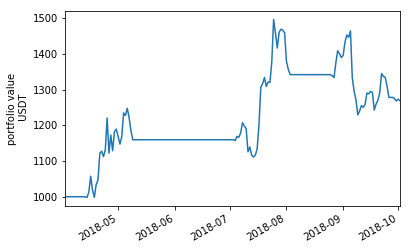

In [8]:
if __name__ == '__main__':
    run_algorithm(
        initialize=initialize,
        capital_base=1000,
        algo_namespace='inside bar',
        handle_data=handle_data,
        analyze=analyze, 
        data_frequency='daily',
        start= pd.to_datetime('2018-04-01', utc=True),
        end= pd.to_datetime('2018-10-01', utc=True),
        exchange_name='bitfinex',
        quote_currency='usdt'
    )